HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

In [1]:
#Importing Libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [66]:
data.shape

(1470, 35)

In [67]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [68]:
data.info()   #No null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [69]:
len(data['Attrition'])

1470

In [70]:
print((data['Attrition'].value_counts()/len(data['Attrition']))*100)


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


Dataset is Imbalanced. 84% of the people did not attrition and 16% did attrition.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

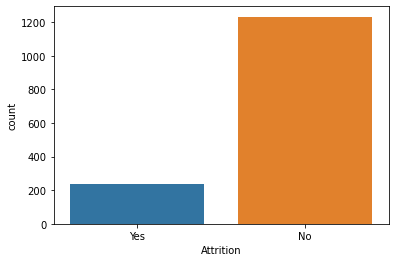

In [71]:
sns.countplot('Attrition', data  = data)

In [72]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [73]:
continuous_cols = []
for column in data.columns:
    if data[column].nunique() > 25:
        continuous_cols.append(column)
        print('{}:{}'.format(column, len(data[column].unique())))
        
#These columns have more number of unique categories.So I have considered them as continuous for my own reference.

Age:43
DailyRate:886
DistanceFromHome:29
EmployeeNumber:1470
HourlyRate:71
MonthlyIncome:1349
MonthlyRate:1427
TotalWorkingYears:40
YearsAtCompany:37


In [74]:
continuous_cols.extend(['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [75]:
print(continuous_cols, len(continuous_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 12


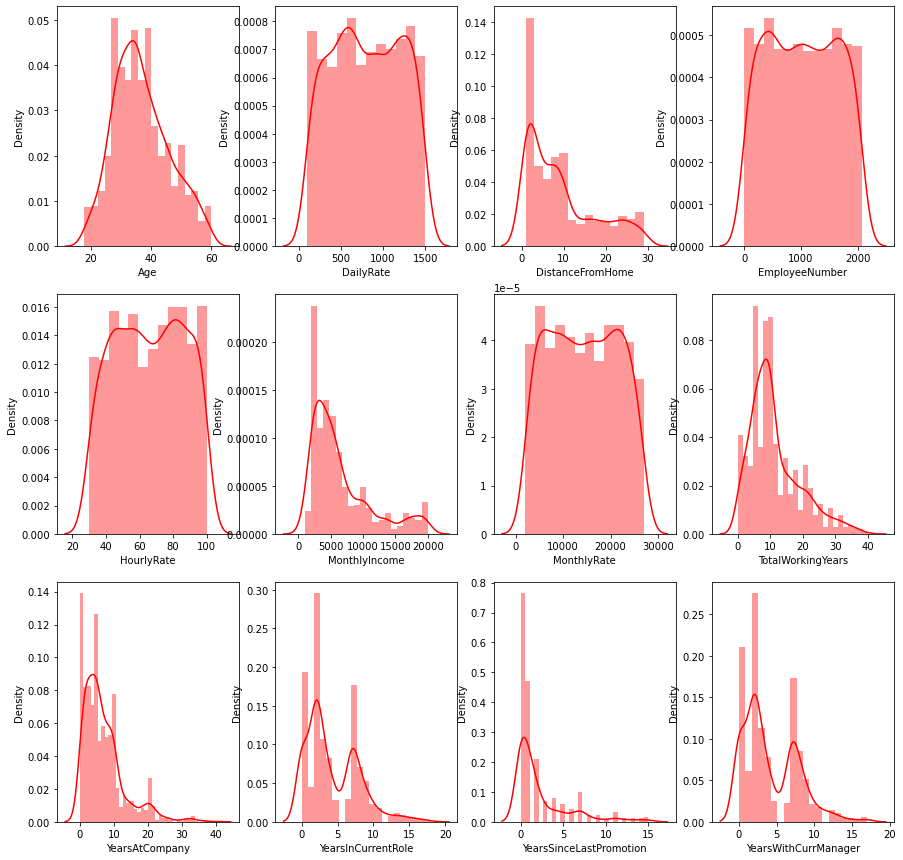

In [140]:
#Understanding the distributions of the continous variables-

plt.figure(figsize = (15,15))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(3,4,i)
    sns.distplot(data[col], color = 'r')
    

#Conclusions- 

1. Majority of the people are in age group 25-38.

2.On an average,majority people stay at a distance within 0-10 km from office. 
  Graph shows that majority people stay near to office.Very few people stay far from office.
    
3.Majority of the people have a monthly income upto 5000.Very few people have income close to or higher than 20000.

4.Majority of the people have work experience between 5-15 years.Very few people have experience higher than 30 years.

5.Looks like majority of the people have been promoted recently i.e their years since promotion is as low as 0 years.




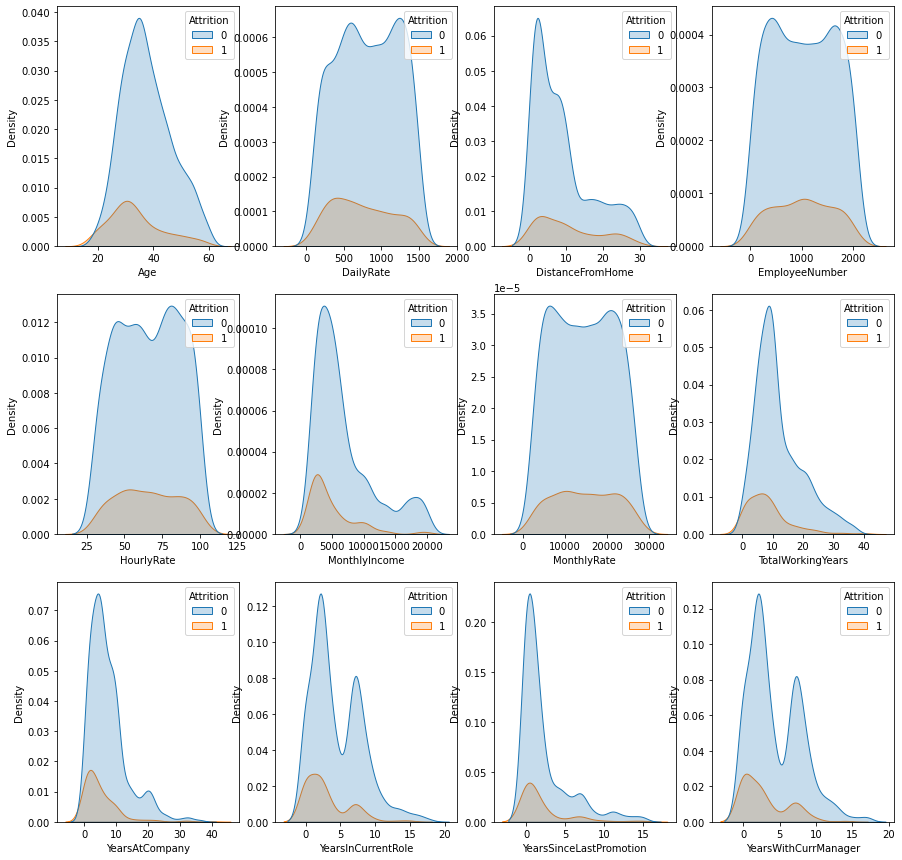

In [148]:
#Understanding the distribution wrt Attrition.


plt.figure(figsize = (15,15))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(3,4,i)
    sns.kdeplot(data[col], hue = data['Attrition'], shade = True)
    

### Conclusions-

1.Majority of the people who attrition are approximately between age group 25-35.

2.Majority of the people who attrition have home within a distance of 0-10 km from office.

3.Majority of the people who attrition have hourly rate between 30-75.

4.Majority of the people who attrition have monthly income upto 5000.

5.Majority of the people who attrition have monthly rate between 5000 - 25000.

6.Majority of the people who attrition have been working for total years between 3-10 years.These people also have a work experience
  less than 10 years at the present company.These people have recently got promotion as well as they have been working for less
  than 3-4 years with their current manager.
    

In [165]:
discrete_cols = [cols for cols in data.columns if cols not in continuous_cols ]
print(discrete_cols)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


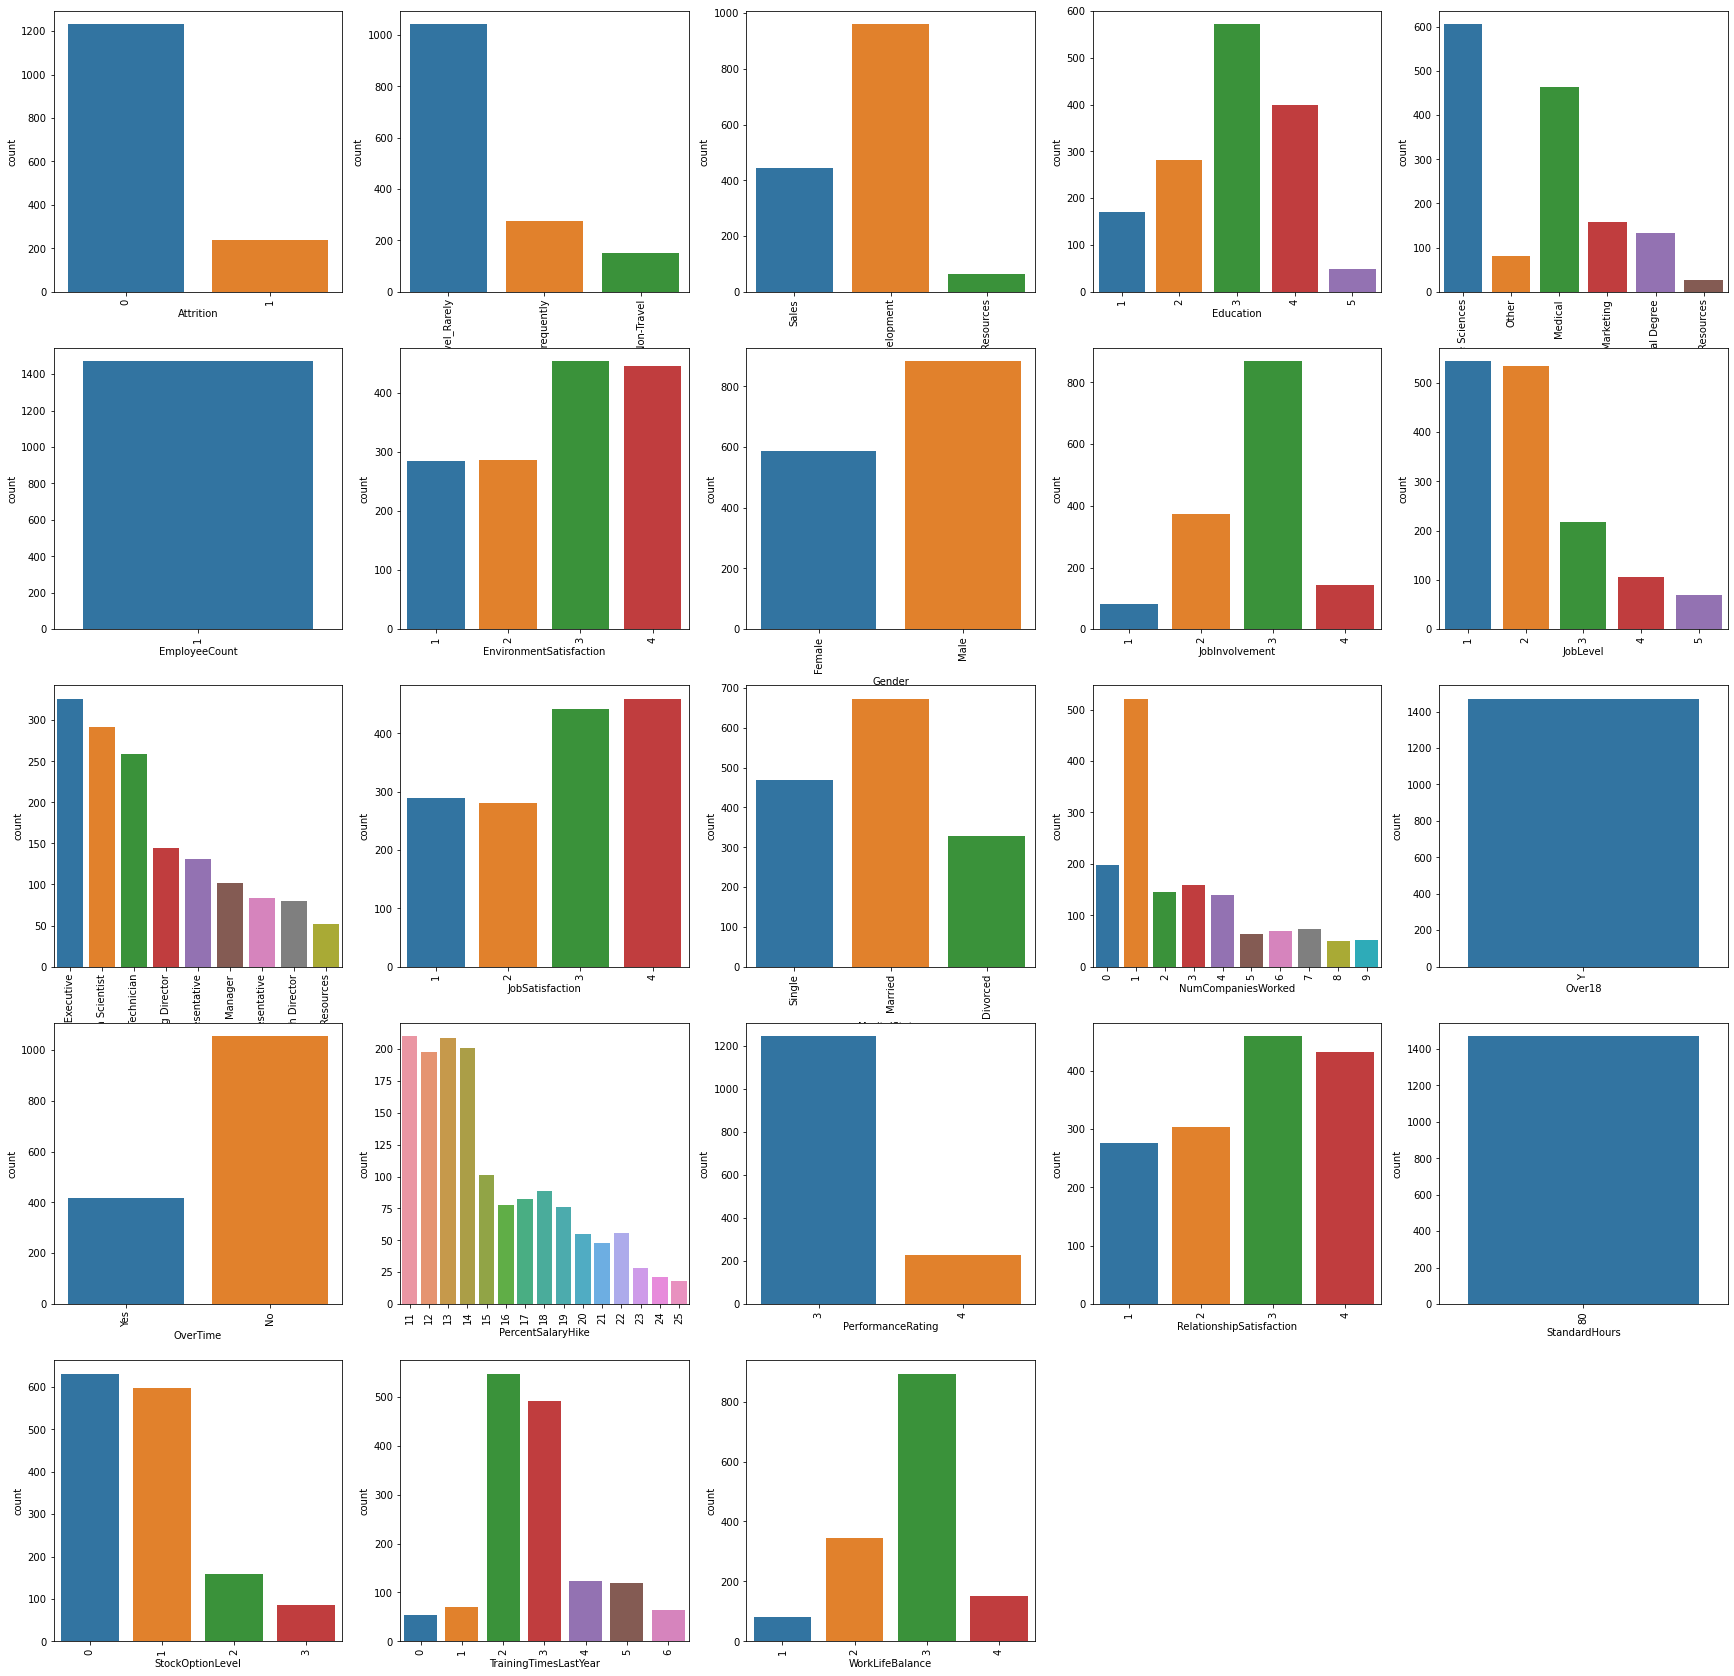

In [167]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(discrete_cols, 1):
    plt.subplot(5,5, i)
    g = sns.countplot(x = column ,data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)  #rotates the x lables by 90 degree to prevent overlapping of names.
    plt.xlabel(column)

### Conclusions-

1.Majority of the people do not attrition as compared to people who attritioned.84% of the employee attrition while 16% don't.

2.Majority of the employees travel rarely and very few employees are non-travellers.

3.'Research and Development' Dept has the highest number of employees followed by 'Sales' and 'Human Resources'.

4.Majority of the employees have an education upto level 3 followed by 4 and very few have education level as high as 5.Level 5 could be a PHD.

5.Among the 'Education field', majority employees have education in 'Life Sciences' followed by  'Medical' and then 'Marketing'. 'Human Resources' have the least number of employees.

6. There are more Male employees compared to Female employees.

7.Majority of the employees have a job involvement of 3 .Few have of 4 while very few employees have job involvement of 1.

8.Majority of the employees are at 'JobLevel' 1 & 2. Few have of 4 while very few employees have 'JobLevel' of 5.This could mean there are few employees with higher work experience.

9.50% of the Employees have 'JobSatisfaction'of 3 & 4 while rest 50% have 'JobSatisfaction'of 1 &2.

10.Most Employees are married.

11.Most of the employees have worked in 1 company and very few have worked for (5-9) companies.

12.Majority of the employees dont do overtime and very few employees do overtime.

13.Mostly salary hike of 10-15% is offered. Very few employees receive hike as high as (24-25)%.


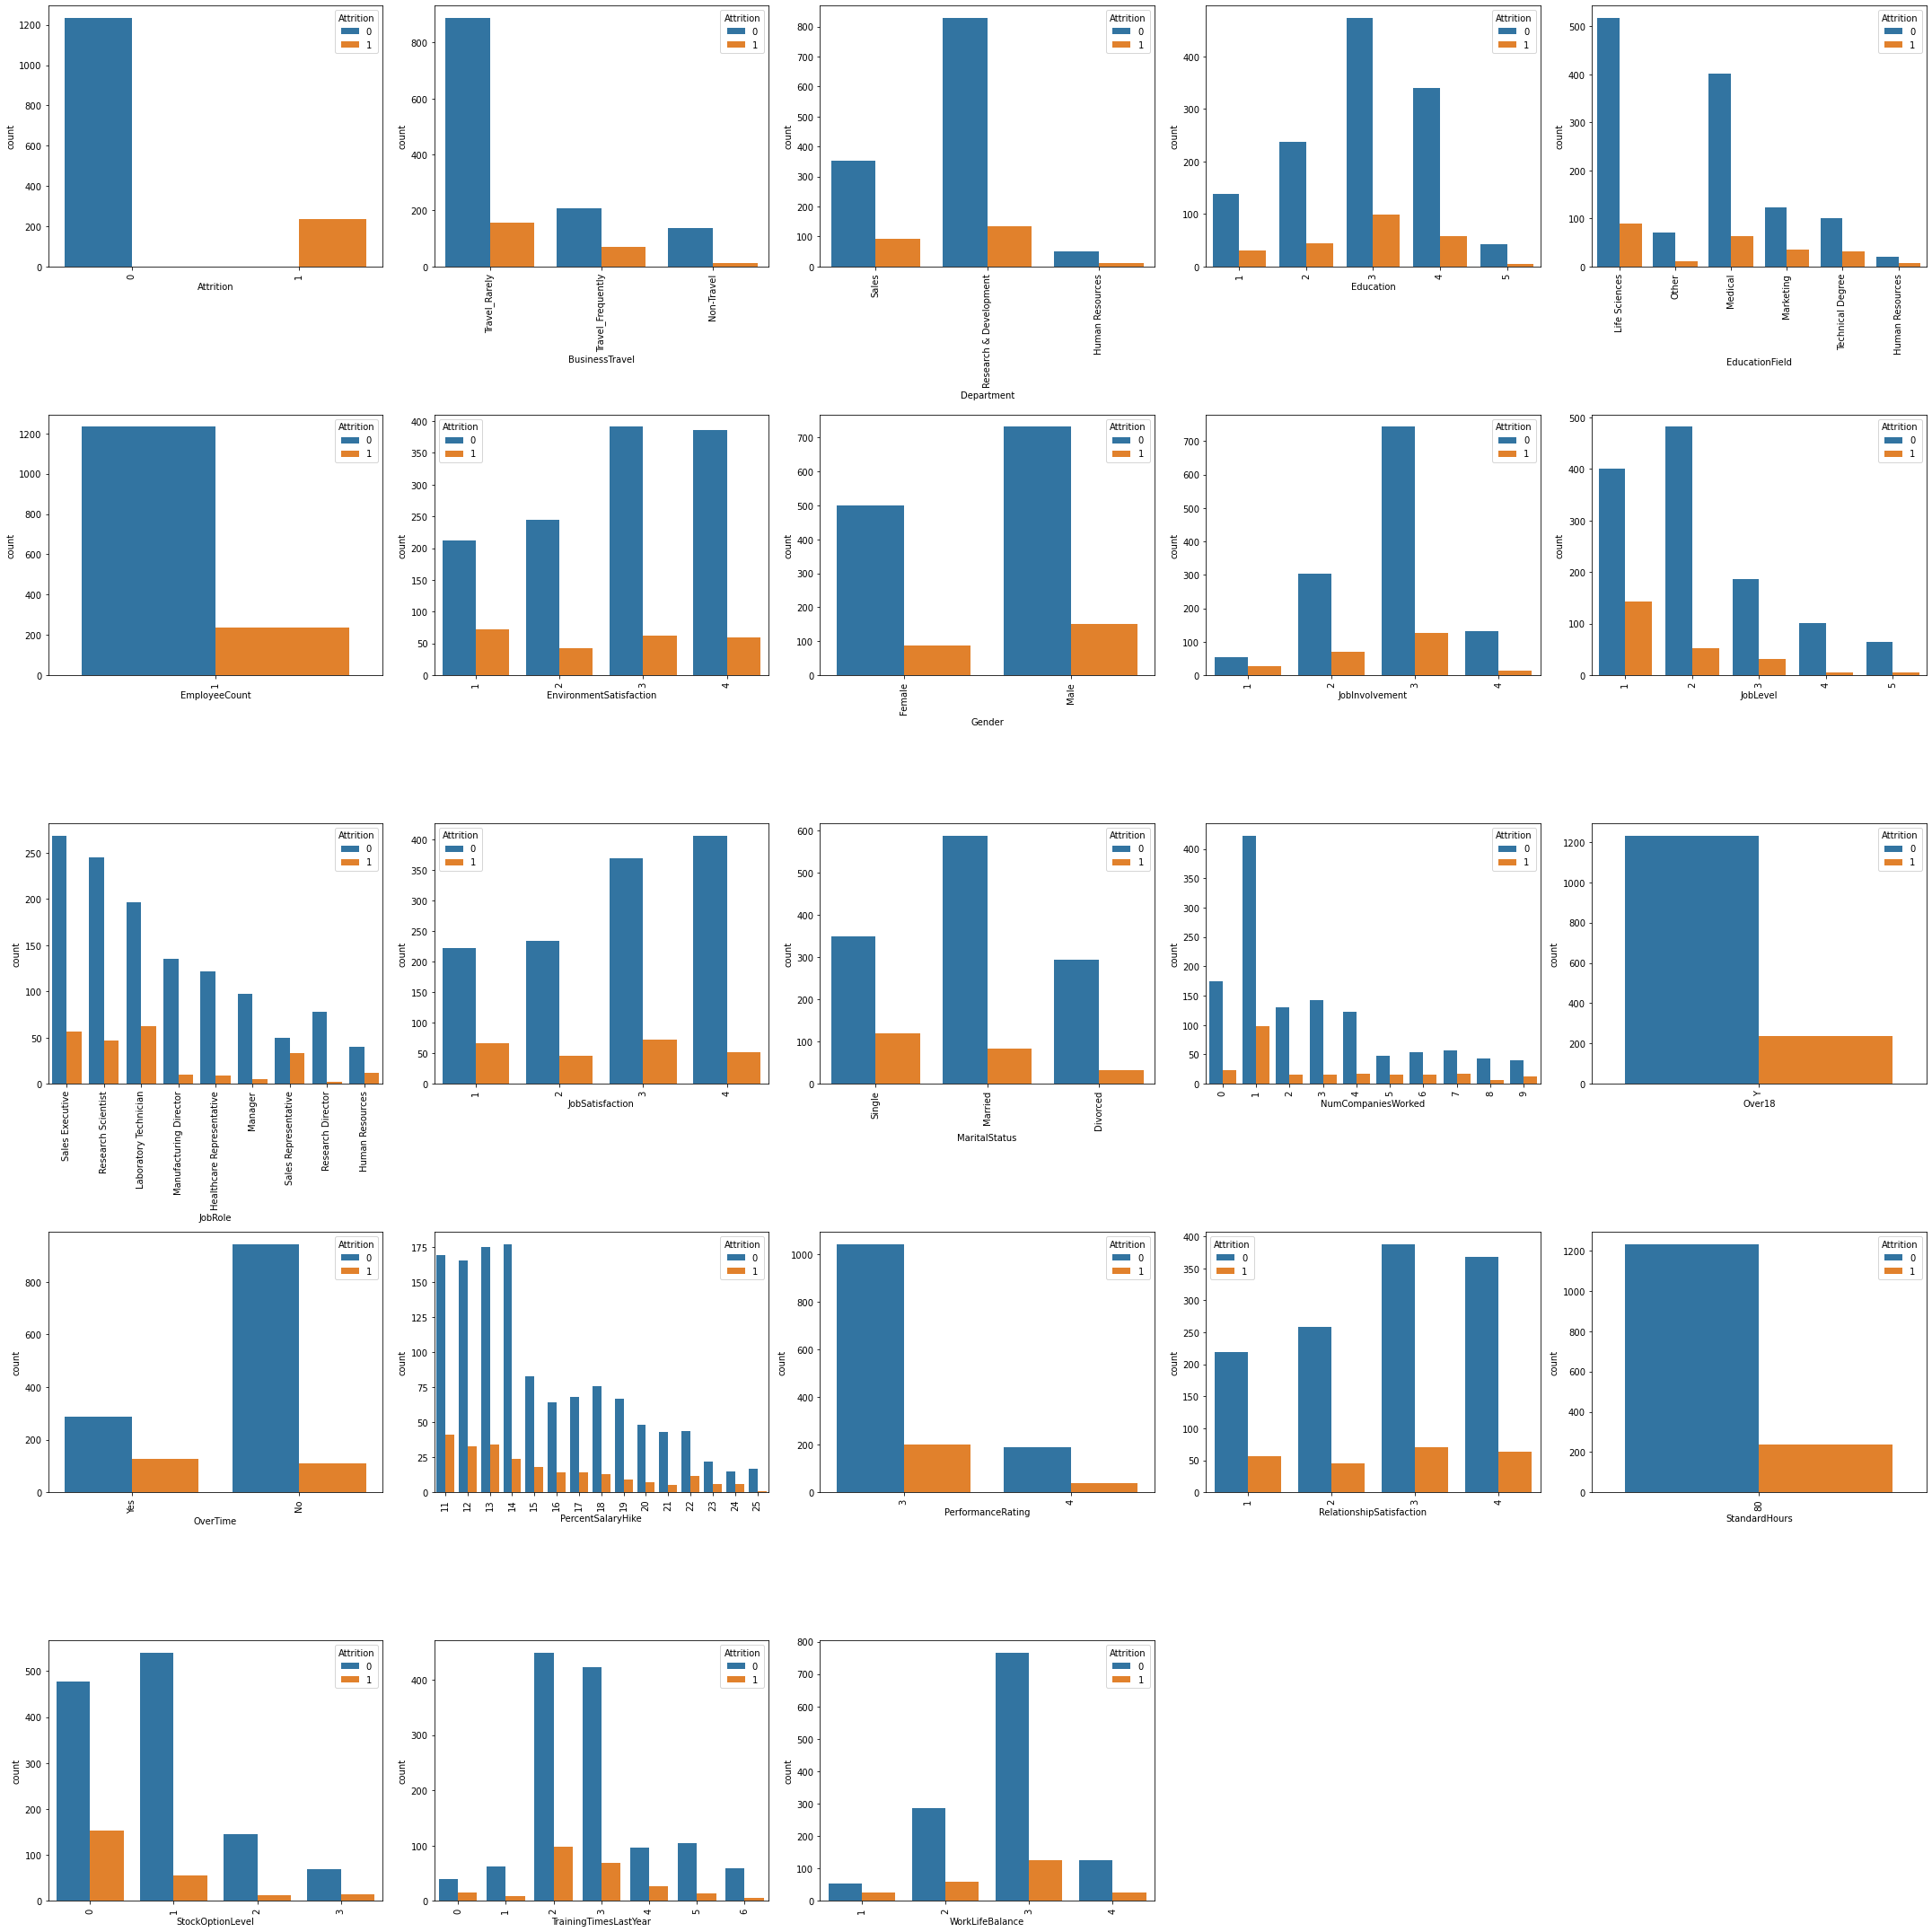

In [169]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(discrete_cols, 1):
    plt.subplot(5,5, i)
    g=sns.countplot(x = column,hue = 'Attrition' ,data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)  #rotates the x lables by 90 degree to prevent overlapping of names.
    plt.xlabel(column)
plt.tight_layout()

In [112]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [117]:
data['Attrition'].dtype

dtype('O')

In [150]:
data['Attrition'] = data.Attrition.astype("category").cat.codes

In [151]:
data['Attrition'].dtype

dtype('int8')

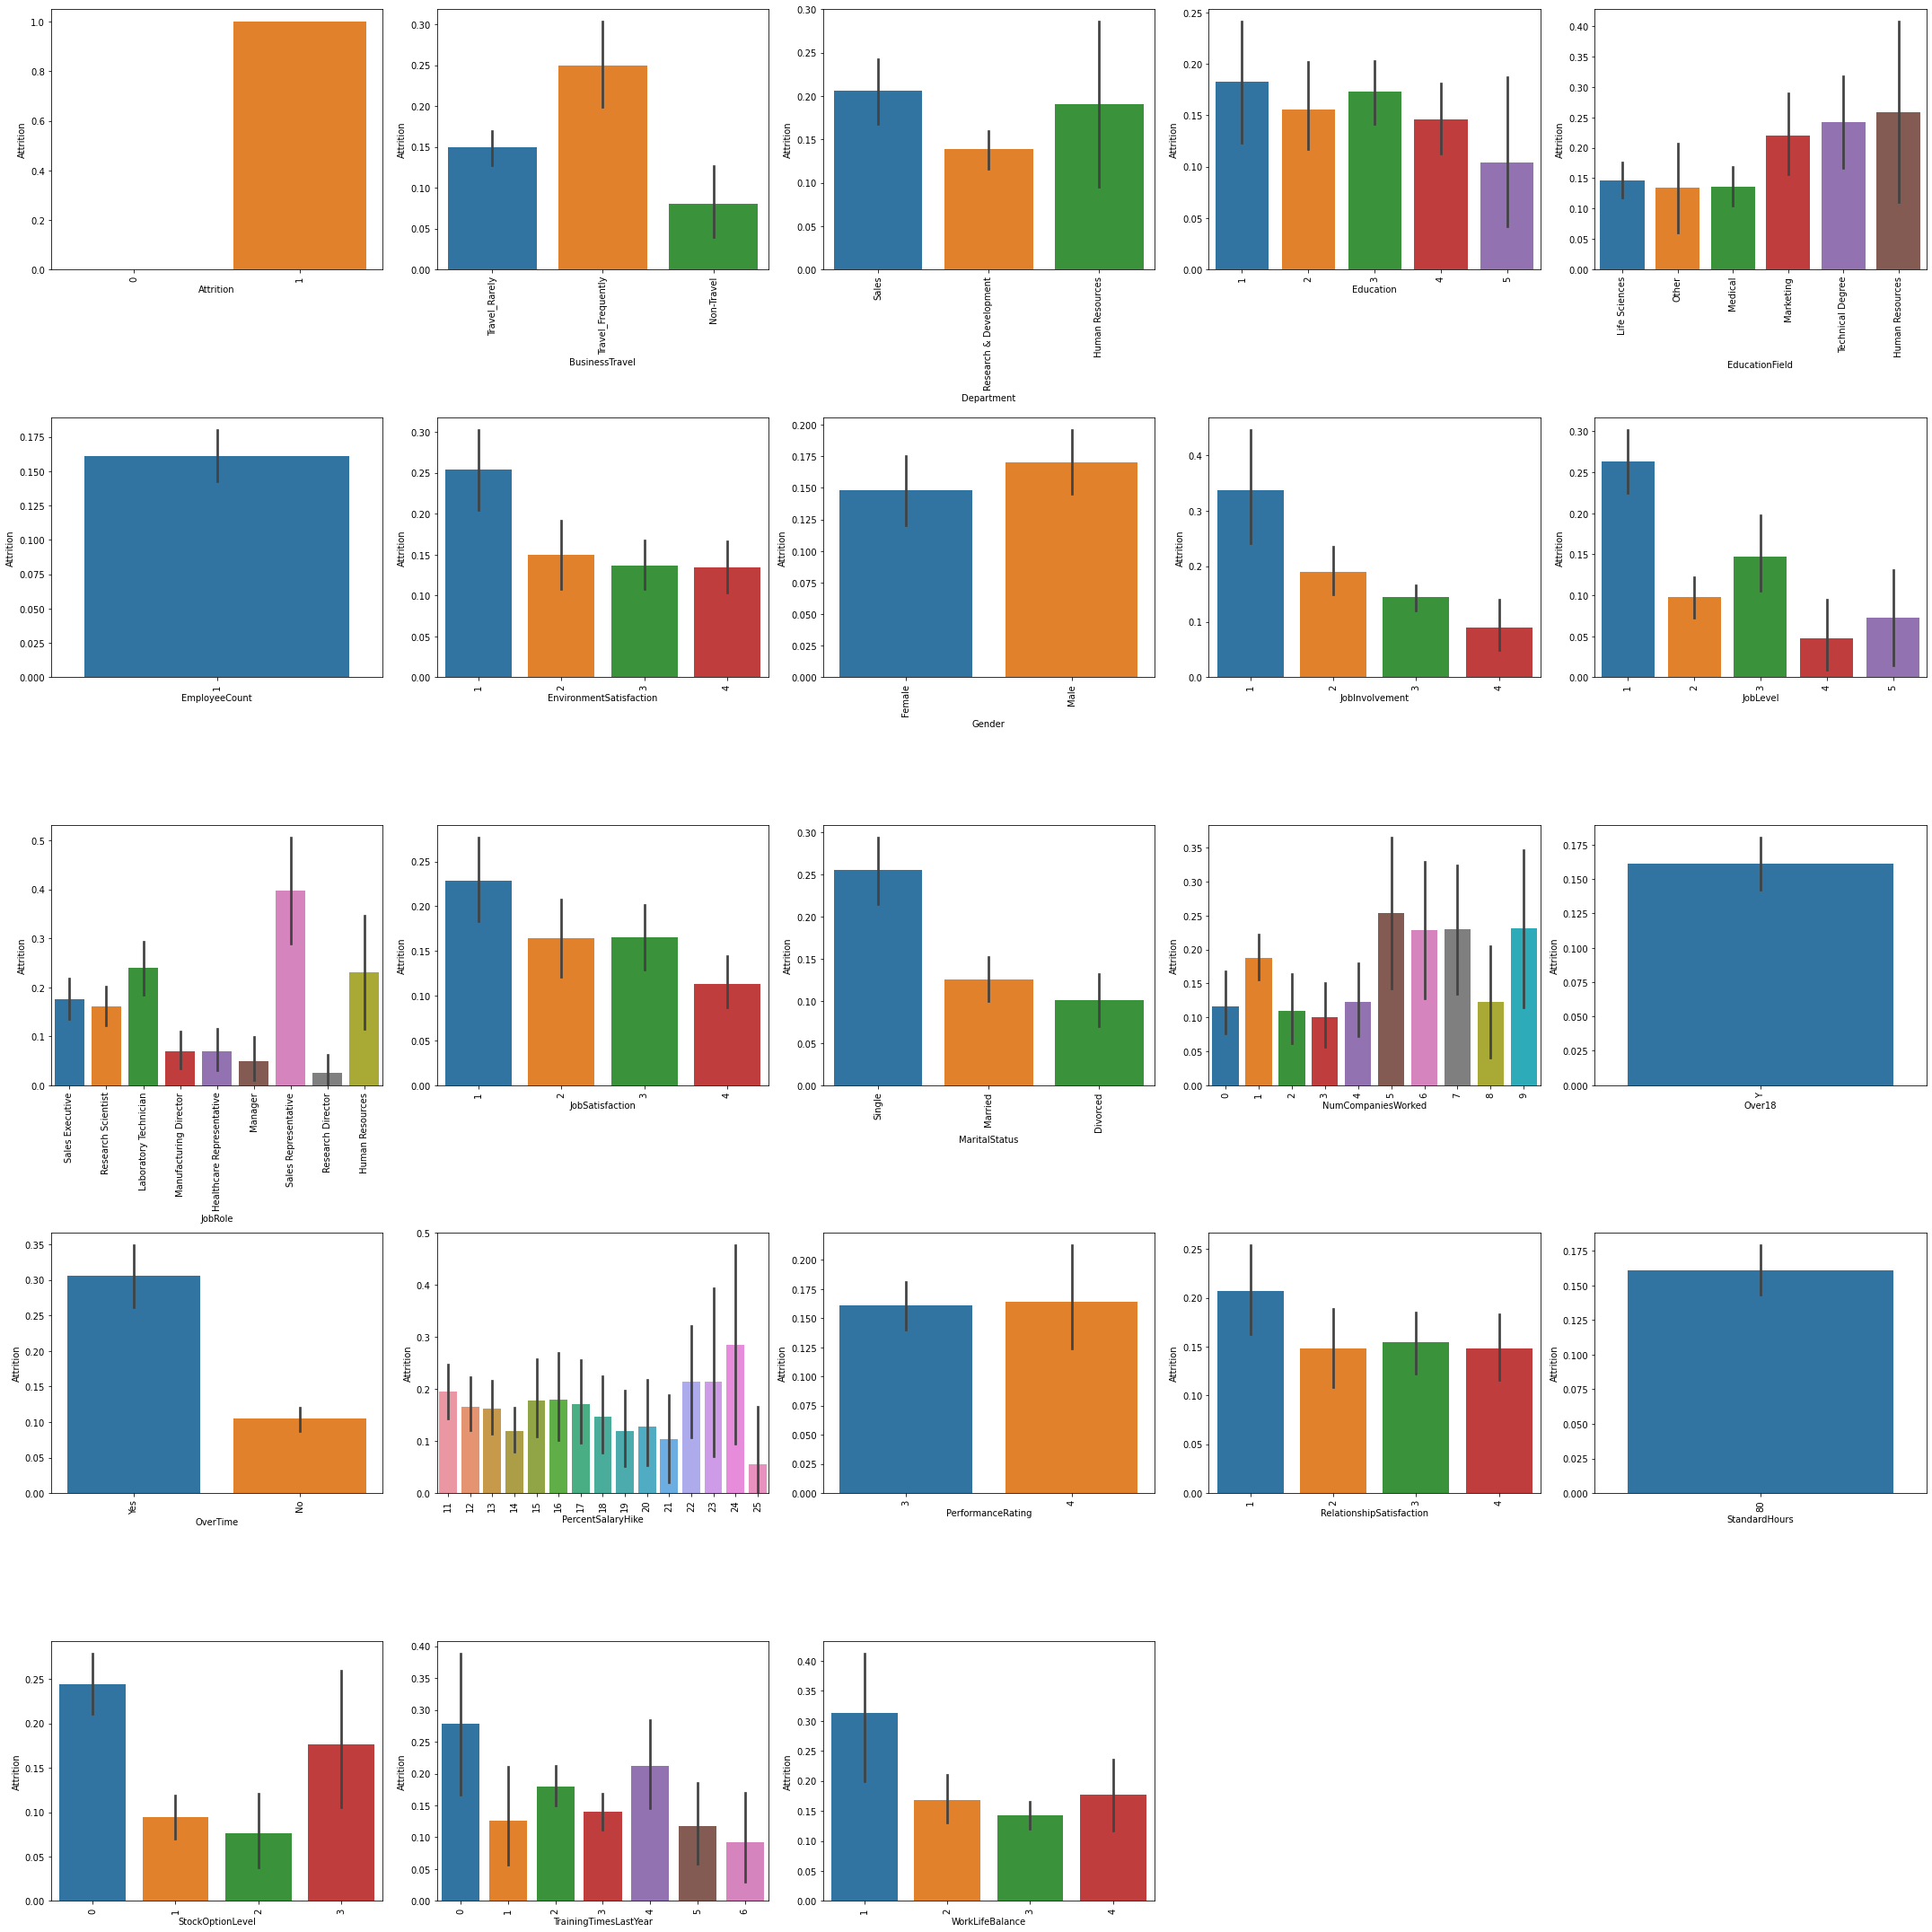

In [171]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(discrete_cols, 1):
    plt.subplot(5,5, i)
    g=sns.barplot(x = column,y = 'Attrition' ,data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)  #rotates the x lables by 90 degree to prevent overlapping of names.
    plt.xlabel(column)
plt.tight_layout()

### Conclusions-

Employees who travel frequently are more likely to attrition.

Employees from Sales Dept are likely to attrition followed by Human Resources Dept.

Employees with Education level 1,2,3 are likely to attrition.

Employees from Education field of 'Human Resources' are most likely to attrition followed by employees who have education in 
some technical field. Lifesciences and Medical field employees are less likely to attrition.

Employees with 'Environmental Satisfaction' & 'Job Satisfaction' of 1 are most likely to attrition. That with 4 are least likely
to attrition.More males attrition than females.

Employees with 'Job Involvement' and 'JobLevel' of 1 are most likely to attrition.

Employees having 'JobRole' of Sales Representative are most likely to attrition followed by Laboratory Technician and Human
Resources employees.

Employees with 'Marital Status' of Single are most likely to attrition while Divorced people are least likely to attrition.

People who have worked for 5-7 companies are more likely to attrition.

Employees who do overtime are more likely to attrition as compared to those employees who dont do overtime.

Employees with 'Relationship Satisfaction' as low as 1 are more likely to attrition.

Employees with 'WorkLifeBalance' as low as 1 are more likely to attrition.